# Comparison of K-Means, Agglomerative Clustering and DBSCAN 

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Generate sample data using make_blobs

In [ ]:
def generate_data(n_samples=750, centers=[[1, 1], [-1, -1], [1, -1]], cluster_std=0.4):
    X, labels_true = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=0)
    return X, labels_true

Apply the specified clustering method

In [ ]:
def perform_clustering(X, method='dbscan', **kwargs):
    if method == 'dbscan':
        model = DBSCAN(**kwargs)
    elif method == 'kmeans':
        model = KMeans(**kwargs)
    elif method == 'agglomerative':
        model = AgglomerativeClustering(**kwargs)
    else:
        raise ValueError(f"Unknown clustering method: {method}")
    
    labels = model.fit_predict(X)
    return labels

Print various clustering evaluation metrics

In [ ]:
def evaluate_clustering(labels_true, labels, X):
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1) if -1 in labels else 0

    print('Estimated number of clusters: %d' % n_clusters)
    print('Estimated number of noise points: %d' % n_noise)
    
    if n_clusters > 0:
        print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
        print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
        print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
        print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
        print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
        
        if n_clusters > 1:
            print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))
        else:
            print("Silhouette Coefficient: Not applicable (only one cluster)")
    else:
        print("No valid clusters found. Cannot compute clustering metrics.")

Plot the clustered data

In [ ]:
def plot_clusters(X, labels, title):
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    
    plt.figure(figsize=(8, 6))
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]  # Black for noise

        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1], color=tuple(col), label=f'Cluster {k}' if k != -1 else 'Noise', s=30)

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()


DBSCAN Results:
Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


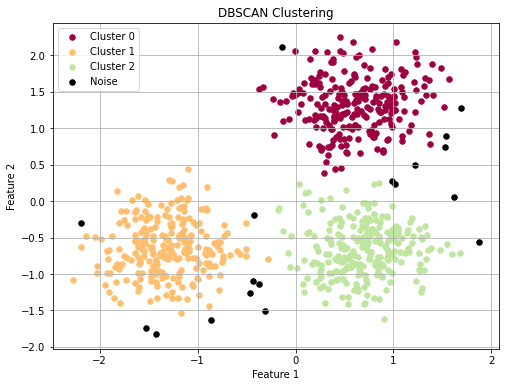

In [2]:
X, labels_true = generate_data()
X = StandardScaler().fit_transform(X)

# DBSCAN
labels_dbscan = perform_clustering(X, method='dbscan', eps=0.3, min_samples=10)
print("\nDBSCAN Results:")
evaluate_clustering(labels_true, labels_dbscan, X)
plot_clusters(X, labels_dbscan, 'DBSCAN Clustering')


K-Means Results:
Estimated number of clusters: 3
Estimated number of noise points: 0
Homogeneity: 0.945
Completeness: 0.945
V-measure: 0.945
Adjusted Rand Index: 0.968
Adjusted Mutual Information: 0.945
Silhouette Coefficient: 0.650


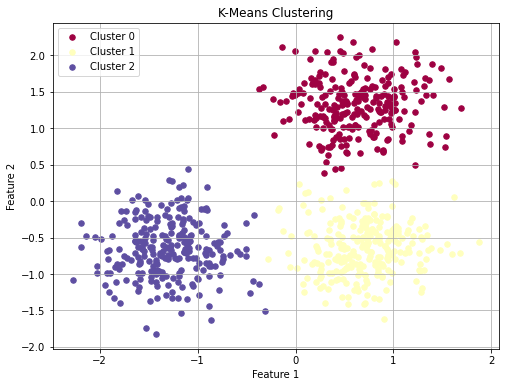

In [3]:
# K-Means
labels_kmeans = perform_clustering(X, method='kmeans', n_clusters=3)
print("\nK-Means Results:")
evaluate_clustering(labels_true, labels_kmeans, X)
plot_clusters(X, labels_kmeans, 'K-Means Clustering')


Agglomerative Clustering Results:
Estimated number of clusters: 3
Estimated number of noise points: 0
Homogeneity: 0.957
Completeness: 0.957
V-measure: 0.957
Adjusted Rand Index: 0.976
Adjusted Mutual Information: 0.956
Silhouette Coefficient: 0.648


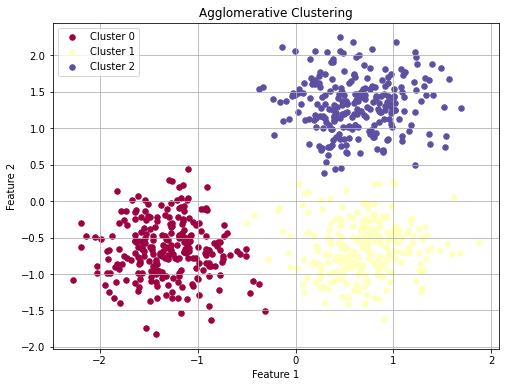

In [4]:
# Agglomerative Clustering
labels_agglo = perform_clustering(X, method='agglomerative', n_clusters=3)
print("\nAgglomerative Clustering Results:")
evaluate_clustering(labels_true, labels_agglo, X)
plot_clusters(X, labels_agglo, 'Agglomerative Clustering')

# Analysis of the results

* The three models identify 3 clusters, but only **DBSCAN** identifies 18 noise points, which is one of it's advantages - **DBSCAN** can detect outliers.

* **Agglomerative Clustering** has the highest homogenity score (0.957), which suggest it did the best job of ensuring that the clusters mostly contain points from the same class.

* **Agglomerative Clustering** and **K-Means** both perform better in terms of completeness compared to **DBSCAN**. **DBSCAN** is less complete because it may leave out some points as noise, which contributes to the lower completeness. Both **K-Means** and **Agglomerative Clustering** ensure that all points are assigned to a cluster, leading to higher completeness.

* **Agglomerative Clustering** outperforms both **K-Means** and **DBSCAN** with the highest ARI score, indicating the best alignment with the true class labels.

* **Agglomerative Clustering** leads with the highest AMI score. This reflects a similar trend to ARI: **Agglomerative Clustering** has the highest agreement with true labels, with **K-Means** coming close, and **DBSCAN** showing somewhat lower alignment due to noise points.

* The relatively high Silhouette scores for **K-Means** and **Agglomerative Clustering** suggest that these methods form well-separated clusters, while **DBSCAN**'s lower score may reflect its ability to identify noise points that affect cluster cohesion.